<a href="https://colab.research.google.com/github/arumugammani02/Task-7/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df=df.drop(columns=["User ID","Gender"])

In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [6]:
X=df.drop(columns=["Purchased"])
y=df.Purchased
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X_test

In [ ]:
X_train

**Fitting Random Forest to the Training set**

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train,sample_weight=3)

RandomForestClassifier()

**Predicting the Test set results**

In [11]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [12]:
rfc.score(X_test, y_test)

0.925

**Making the Confusion Matrix**

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test)
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
train_y_pred = rfc.predict(X_train)
confusion_matrix_2= confusion_matrix(y_train, train_y_pred)
print(confusion_matrix_1)
print(confusion_matrix_2)

[[54  4]
 [ 2 20]]
[[199   0]
 [  1 120]]


**Visualising the Training set results**

Text(42.0, 0.5, 'Truth')

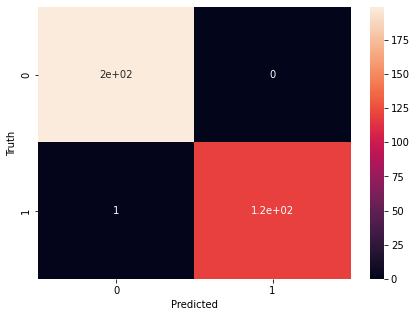

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Test set results**

Text(42.0, 0.5, 'Truth')

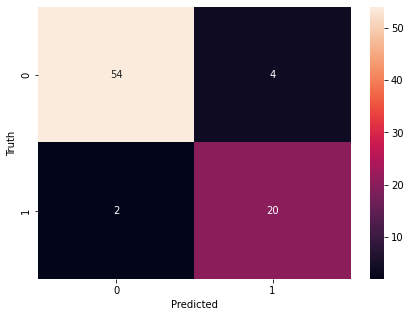

In [15]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')